# <span style=color:red> IBM Data Science - Course(7): Data Analysis Final Project: House Sales in King County, USA </span>

### Instructions
#### In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions

#### I will complete the required project in this notebook in a detailed way to make it educational and usable as a review notebook later on.

# About the Dataset

#### This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


### **Import the required libraries**


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets

In [102]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=0)

In [103]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1
#### Display the data types of each column using the function dtypes.

In [107]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [109]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling

### Question 2

#### Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. 

In [111]:
# remove unnecessary columns from your dataset 
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

# get the statistical summary of the data
print(df.describe())


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

### 2.2) We can see we have missing values for the columns  bedrooms and  bathrooms 

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


### 2.3) We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace().

In [116]:
mean_bedrooms = df['bedrooms'].mean()
df['bedrooms'] = df['bedrooms'].fillna(mean_bedrooms) #applies the operation directly on the original data, making the change permanent. 

### 2.4) We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace().

In [119]:
mean_bathrooms = df['bathrooms'].mean()
df['bathrooms'] = df['bathrooms'].fillna(mean_bathrooms) #applies the operation directly on the original data, making the change permanent. 

In [121]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis (Scatter Plot, Box Plot, Correlation, Reg)

### Question 3
#### Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame.

In [130]:
# Number of unique value / floors columns
floor_counts = df['floors'].value_counts().to_frame()

# new column for counter;
floor_counts.columns = ['Number of Houses']

print(floor_counts)

        Number of Houses
floors                  
1.0                10680
2.0                 8241
1.5                 1910
3.0                  613
2.5                  161
3.5                    8


### Question 4
#### Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.
#### This plot will allow you to visually assess whether houses with a waterfront view have more price outliers compared to those without. If houses with a waterfront view have more outliers, their price distribution will be wider, and the boxplot will show more points outside the main box.
#### Conclusion: From this plot, we can see that houses with a waterfront view generally have higher prices and fewer outliers, while houses without a waterfront view exhibit a broader range of prices with more outliers.

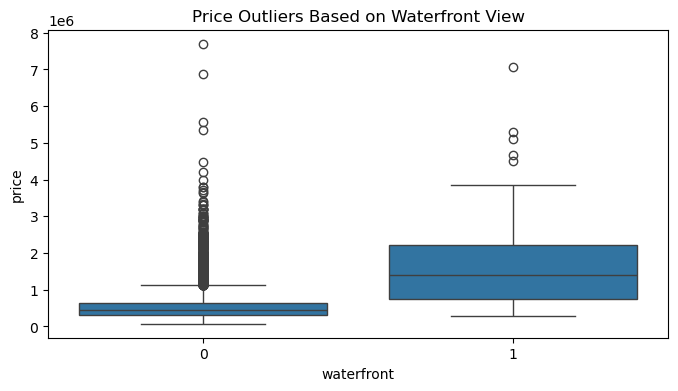

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot 
plt.figure(figsize=(8, 4))  # set the size of the plot
sns.boxplot(x='waterfront', y='price', data=df)

# Title for graph
plt.title('Price Outliers Based on Waterfront View')


plt.show()


### Question 5
#### Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.
#### The provided Python code aims to visualize the relationship between two variables in a DataFrame (df) using the regplot function from the seaborn library. Specifically, it is used to determine whether the sqft_above (square footage above ground) feature is positively or negatively correlated with the price feature.
#### Conclusion: The resulting plot shows the relationship between sqft_above and price, along with a regression line. Observing the plot, it generally indicates a positive relationship. This means that as the sqft_above value increases, the price value tends to increase as well. This suggests that houses with larger square footage above ground generally have higher prices.
####  If there's higher density in a specific range, it might indicate that houses within this range are more common and their prices can be analyzed with greater consistency or frequency in that segment of the market.

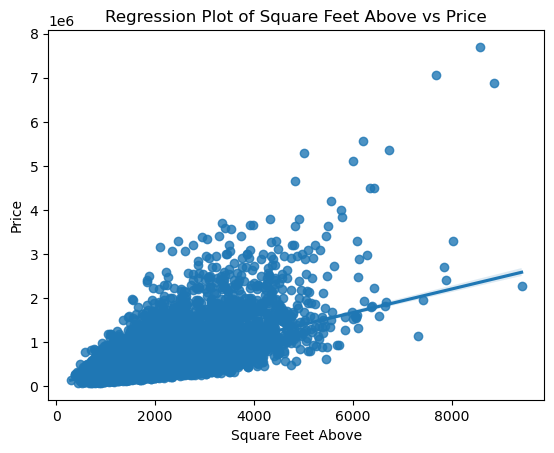

In [153]:
sns.regplot(x='sqft_above', y='price', data=df)
plt.xlabel('Square Feet Above')
plt.ylabel('Price')
plt.title('Regression Plot of Square Feet Above vs Price')
plt.show()

### 5.2) We can use the Pandas method corr() to find the feature other than price that is most correlated with price.
#### Strong Relationships: Columns with a high positive correlation with price may have a strong relationship with increasing the price.
#### In summary, features such as sqft_living, sqft_above, grade, and sqft_living15 show the strongest positive correlations with the price, indicating they are significant predictors of property value. On the other hand, features like zipcode, condition, and yr_built have very weak correlations, suggesting they have minimal influence on price.
#### If a particular feature has a negative relationship with price, an increase in that feature may decrease the price.

In [165]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Module 4: Model Development
### We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.
#### The R² score (coefficient of determination) is a statistical measure that indicates how well the independent variables (features) explain the variability of the dependent variable (target).
##### In summary, a low R² score means that the model has poor explanatory power and the feature used does not contribute significantly to predicting the target variable.

In [180]:
# These steps are fundamental for setting up and evaluating a linear regression model.
X = df[['long']]
Y = df['price']

lm = LinearRegression() #The model will learn the linear relationships between the features and the target variable.
lm.fit(X,Y) #The fit method trains the model on the data provided (X and Y). 
lm.score(X, Y)

#The score method calculates the R² score of the model. 
#The R² score measures how well the model explains the variance in the target variable. 
#This value ranges from 0 to 1, where 1 indicates a perfect fit.

0.00046769430149007363

# Question 6 (One variable regresion / r^2 score)
#### Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.
#### The R² score ranges from 0 to 1.
#### 0 means that the model explains none of the variability in the target variable.
#### 1 means that the model explains all of the variability in the target variable.


In [178]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assume df is your DataFrame with the necessary columns
# Prepare the feature (X) and target (Y) variables
X = df[['sqft_living']]  # Feature variable
Y = df['price']          # Target variable

# Create the Linear Regression model
lm = LinearRegression()

# Fit the model to the data
lm.fit(X, Y)

# Calculate the R² score
r2 = lm.score(X, Y)
print(f'R² score: {r2:.4f}')



R² score: 0.4929


### Question 7 (Features Regression)
#### Fit a linear regression model to predict the 'price' using the list of features:

In [188]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

### 7.2) Then calculate the R^2. 

In [191]:
# Prepare the feature and target variables
X = df[features]  # Features data
Y = df['price']   # Target variable

# Create the Linear Regression model
lm = LinearRegression()

# Fit the model to the data
lm.fit(X, Y)

# Calculate the R² score
r2 = lm.score(X, Y)
print(f'R² score: {r2:.4f}')

R² score: 0.6577


#### R^2 Score Conlusion: 

##### Performance Difference: The higher R² score of the second model (0.65) compared to the first model (0.49) indicates that using multiple features allows the model to better explain the variance in price. The second model is more effective at predicting price because it incorporates more information.

##### Impact of Features: While a single feature (sqft_living) can explain some of the variance in price, using multiple features together allows the model to gain more insights and make more accurate predictions. Therefore, the R² score of the model with multiple features is higher.

##### In summary, the model that uses multiple features performs better and explains more of the variance in price compared to the model using just one feature.

### This steps will help with Question 8 !!!!!!!!

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


### Question 8: (PIPELINE)
#### Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.
### 1. What is a Pipeline and What Does It Do?
#### Pipeline: The Pipeline class in sklearn combines data processing and modeling steps into a single workflow. This allows us to apply sequential operations such as scaling, transformation, and modeling in an organized manner.
### Advantages:
#### - Organized Code: Ensures that each step is executed in sequence, making the code cleaner and more readable.
#### - Reusability: Allows us to reuse and modify the data processing and modeling steps.
#### - Easy Error Management: Makes it easier to debug by treating the entire process as a single entity.

In [195]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [198]:
# Define the list of tuples
steps = [
    ('scale', StandardScaler()), 
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model', LinearRegression())
]

# Create the pipeline
pipeline = Pipeline(steps=steps)

# Prepare the feature (X) and target (Y) variables
X = df[features]  # Features data
Y = df['price']   # Target variable

# Fit the pipeline to the data
pipeline.fit(X, Y)

# Make predictions and calculate R² score
Y_pred = pipeline.predict(X)
r2 = r2_score(Y, Y_pred)
print(f'R² score: {r2:.4f}')

R² score: 0.7512


# Module 5: Model Evaluation and Refinement
### Import the necessary modules:

In [206]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


#### We will split the data into training and testing sets:
#### This process is essential for properly training and evaluating your model, and it helps ensure that the model’s accuracy and generalization capabilities are properly assessed.
### İmportant : General Recommendation:

#### For datasets of varying sizes, a test set size between 15-30% is generally suitable. Larger datasets can accommodate a larger test set, while smaller datasets may require a smaller test set.

In [209]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9 (RIDGE REGRESSION)
#### Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.
#### alpha=0.1: This value controls the amount of regularization applied to the model. Regularization helps to prevent overfitting by penalizing large coefficients.
### Important : Alpha (α): Experiment with different α values to balance regularization and model performance, using methods like grid search to identify the best α.

In [215]:
from sklearn.linear_model import Ridge
# Create the Ridge Regression model with regularization parameter alpha set to 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model using the training data
ridge_model.fit(x_train, y_train)

# Predict the target variable using the test data
y_pred = ridge_model.predict(x_test)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2:.4f}')

R² score: 0.6479


### Question 10
#### Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.
#### This code snippet adds a polynomial feature transformation to your Ridge regression model.

In [225]:
# Create a polynomial features transformer with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Create a Ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Create a pipeline that first transforms the data with polynomial features and then applies Ridge regression
pipeline = Pipeline([
    ('poly', poly),
    ('ridge', ridge_model)
])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(x_test)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print(f'R² score with polynomial features and Ridge regression: {r2:.4f}')


R² score with polynomial features and Ridge regression: 0.7003


## Summary
### Question10 code snippet improves the Ridge regression model by:

#### Adding Polynomial Features: The polynomial feature transformer helps capture non-linear relationships between features and the target variable, which a simple linear model might miss.

#### Combining with Ridge Regression: The Ridge regression model applies regularization to prevent overfitting and manage the complexity of the model.

#### Using a Pipeline: The pipeline simplifies the process by ensuring that the polynomial transformation and Ridge regression are applied sequentially and correctly.

#### Overall, this approach helps to create a more flexible model that can better capture complex patterns in the data while controlling for overfitting through regularization.

## EXTRA STEP; Adjusting the Regularization Parameter (α)
#### Adjusting the regularization parameter α in Ridge regression is a critical step in fine-tuning the model. By testing different α values, you can identify the optimal level of regularization that improves the model’s performance on test data, thereby avoiding both overfitting and underfitting.

In [231]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Define a list of α values to test
alpha_values = [0.01, 0.1, 1, 10]

# Iterate through each α value
for alpha in alpha_values:
    # Create a Ridge regression model with the current α value
    ridge_model = Ridge(alpha=alpha)
    
    # Fit the model to the training data
    ridge_model.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = ridge_model.predict(x_test)
    
    # Calculate the R² score of the model
    r2 = r2_score(y_test, y_pred)
    
    # Print the α value and corresponding R² score
    print(f'α={alpha}, R² score: {r2:.4f}')


α=0.01, R² score: 0.6479
α=0.1, R² score: 0.6479
α=1, R² score: 0.6478
α=10, R² score: 0.6471


### Steps and Reasons for Using Pipeline and Ridge Regression with Polynomial Feature Transformation

1. **Create a Pipeline:**
   - **Step:** Create a `Pipeline` that combines data preprocessing and modeling steps.
   - **Reason:** A pipeline allows you to systematically apply data transformation and modeling. This ensures that all steps are performed correctly and completely, making your code cleaner and more manageable.

2. **Add Polynomial Feature Transformation:**
   - **Step:** Add polynomial feature transformation (e.g., second-degree polynomial) to the pipeline.
   - **Reason:** Polynomial transformation helps capture nonlinear relationships in your dataset. This enables the model to learn complex relationships in the data, potentially leading to better performance.

3. **Add Ridge Regression:**
   - **Step:** Add Ridge regression to the pipeline and set the regularization parameter (α).
   - **Reason:** Ridge regression helps control model complexity and prevent overfitting. Regularization can enhance the model’s general performance and reduce noise in the dataset.

4. **Fit the Pipeline with Training Data:**
   - **Step:** Fit the pipeline with training data to perform both transformation and modeling.
   - **Reason:** Fitting with training data allows the model to apply both data transformation and regression analysis, ensuring the model is appropriately tuned to the data.

5. **Make Predictions and Calculate R² Score on Test Data:**
   - **Step:** Make predictions on test data and calculate the R² score.
   - **Reason:** Performance on test data helps evaluate how well your model generalizes. The R² score shows how well the model explains the variance in the test data, providing a measure of the model’s success.

### Why Use This Approach?

- **Managing Complexity:** A pipeline enables you to execute data transformation and modeling in an orderly manner. This ensures that all processes are applied correctly and completely.
  
- **Regularization and Polynomial Features:** Polynomial transformation helps capture nonlinear relationships, while Ridge regression controls this complexity and prevents overfitting. This combination can enhance the model’s overall performance.

- **Ease of Management:** By using a pipeline, you consolidate all steps into a single model object. This makes your code cleaner and more manageable, simplifying both implementation and maintenance processes.

---

These steps can help improve your model's ability to fit the data and enhance its overall performance.
